<a href="https://colab.research.google.com/github/Taketo-Muroya/Nowcasting-Project/blob/main/consumption-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setting Up

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
os.chdir('drive/MyDrive/Colab Notebooks/Reseach_Project')

In [3]:
def multivariate_data(dataset, target, start_index, end_index, 
                      history_size, target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    # add current dataset
    indices = range(i-history_size, i+1, step)
    temp = pd.DataFrame(dataset[indices])
    # replace current target to previous one
    temp.iat[history_size, 0] = temp.iat[history_size-1, 0]
    data.append(np.array(temp))

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [4]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def model_eval_metrics(y_true, y_pred, classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 
                      'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 
                      'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 
                      'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 
                      'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata

## Target variable: Synthetic Consumption Index

In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
con = pd.read_csv('data/shouhi.csv', index_col=0, date_parser=dateparse, dtype='float')
con['3ma'] = con['SCI'].rolling(3).mean()
con['3mom'] = 100*con['3ma'].pct_change()
con

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,SCI,mom,3ma,3mom
date,,,,
1994-01-01,84.2,NaN,NaN,NaN
1994-02-01,82.1,-2.5,NaN,NaN
1994-03-01,82.6,0.7,82.966667,NaN
1994-04-01,83.2,0.6,82.633333,-0.401768
1994-05-01,82.9,-0.4,82.900000,0.322711
...,...,...,...,...
2021-06-01,95.5,1.3,95.366667,0.104969
2021-07-01,95.3,-0.3,95.033333,-0.349528
2021-08-01,93.6,-1.8,94.800000,-0.245528


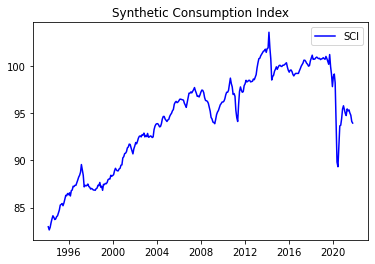

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(con.index, con['3ma'], linestyle='-', color='b', label='SCI')
ax.legend()
plt.title('Synthetic Consumption Index')
plt.savefig("images/SCI.png")

## Google Trend

In [7]:
gt = pd.read_csv('data/consumption_data/consumption_data.csv', index_col=0, date_parser=dateparse, dtype='float')
gt.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,食料,穀類,米,食パン,アップルパン,あんパン,ジャムパン,ぶどうパン,メロンパン,カレーパン,ピロシキ,揚げパン,ピザパン,野菜パン,うどん_x,そば_x,パスタ,スパゲッティ_x,中華麺,カップ麺,即席麺,ワンタン,シューマイ,ギョーザ,春巻,ビーフン,小麦粉,もち,パン粉,そば粉,米粉,白玉粉,ホットケーキ,お好み焼_x,魚介,まぐろ,あじ,いわし,かつお,かれい,...,傷害保険,旅行保険,寄付金,共同募金,ふるさと納税,保育園_y,保育所_y,認定こども園,延長保育料,幼稚園,介護サービス,在宅サービス,ホームヘルプサービス,通所リハビリテーション,デイケア,通所サービス,デイサービス,施設サービス,介護老人福祉施設,介護老人保健施設,短期入所生活介護,短期入所療養介護,ショートステイ,郵便局,銀行,キャンセル料,こづかい,交際費,香典,見舞金,謝礼金,祝儀,持参金,結納金,共益費,町内費,消防費,同窓会費,労働組合費,留学
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-01,43.0,22.0,68.0,52.0,30.0,62.0,31.0,28.0,61.0,74.0,22.0,68.0,15.0,43.0,96.0,77.0,79.0,66.0,87.0,66.0,15.0,88.0,50.0,14.0,19.0,47.0,35.0,67.0,55.0,21.0,45.0,33.0,24.0,15.0,90.0,54.0,76.0,57.0,93.0,32.0,...,32.0,6.0,12.0,7.0,23.0,68.0,51.0,74.0,14.0,65.0,52.0,12.0,4.0,22.0,70.0,36.0,84.0,52.0,22.0,26.0,19.0,2.0,72.0,61.0,71.0,37.0,5.0,14.0,76.0,22.0,17.0,40.0,10.0,17.0,24.0,4.0,11.0,0.0,4.0,35.0
2021-08-01,40.0,8.0,69.0,54.0,44.0,73.0,18.0,19.0,65.0,71.0,27.0,62.0,57.0,52.0,97.0,78.0,77.0,63.0,88.0,65.0,9.0,67.0,32.0,14.0,24.0,51.0,40.0,71.0,54.0,17.0,48.0,38.0,32.0,8.0,74.0,55.0,77.0,43.0,80.0,30.0,...,29.0,6.0,11.0,5.0,22.0,77.0,61.0,60.0,14.0,56.0,49.0,30.0,13.0,18.0,48.0,37.0,75.0,41.0,23.0,32.0,13.0,2.0,73.0,59.0,71.0,56.0,8.0,13.0,90.0,26.0,26.0,34.0,14.0,19.0,14.0,13.0,14.0,0.0,14.0,34.0
2021-09-01,51.0,15.0,90.0,62.0,26.0,59.0,27.0,42.0,62.0,80.0,44.0,86.0,59.0,54.0,92.0,72.0,78.0,58.0,80.0,91.0,18.0,78.0,64.0,14.0,26.0,60.0,44.0,82.0,67.0,17.0,62.0,70.0,34.0,15.0,76.0,51.0,76.0,50.0,80.0,36.0,...,33.0,6.0,11.0,9.0,35.0,76.0,63.0,85.0,50.0,79.0,54.0,27.0,11.0,24.0,62.0,29.0,90.0,51.0,21.0,38.0,29.0,15.0,85.0,61.0,77.0,31.0,15.0,14.0,75.0,26.0,10.0,40.0,29.0,13.0,15.0,5.0,3.0,0.0,11.0,42.0
2021-10-01,58.0,13.0,66.0,48.0,39.0,67.0,24.0,21.0,53.0,49.0,32.0,59.0,11.0,76.0,80.0,78.0,60.0,46.0,61.0,56.0,9.0,66.0,38.0,20.0,9.0,48.0,32.0,67.0,47.0,17.0,40.0,27.0,23.0,15.0,62.0,53.0,75.0,41.0,55.0,29.0,...,24.0,6.0,12.0,9.0,35.0,64.0,50.0,66.0,10.0,63.0,49.0,17.0,9.0,17.0,57.0,25.0,72.0,41.0,26.0,38.0,14.0,7.0,72.0,44.0,64.0,30.0,16.0,16.0,78.0,22.0,26.0,47.0,15.0,21.0,39.0,3.0,6.0,30.0,8.0,28.0
2021-11-01,53.0,10.0,60.0,43.0,41.0,44.0,37.0,18.0,55.0,62.0,50.0,65.0,29.0,36.0,85.0,79.0,59.0,46.0,65.0,48.0,19.0,64.0,38.0,13.0,15.0,40.0,33.0,71.0,43.0,18.0,42.0,27.0,22.0,19.0,72.0,54.0,70.0,34.0,43.0,28.0,...,29.0,7.0,13.0,5.0,64.0,52.0,44.0,59.0,15.0,50.0,48.0,21.0,3.0,12.0,57.0,43.0,71.0,40.0,20.0,38.0,15.0,7.0,88.0,48.0,66.0,33.0,9.0,21.0,92.0,20.0,31.0,52.0,7.0,24.0,22.0,12.0,12.0,15.0,8.0,27.0


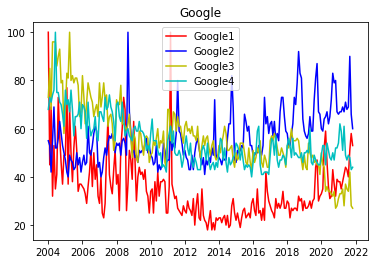

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gt.index, gt['食料'][:], linestyle='-', color='r', label='Google1')
ax.plot(gt.index, gt['米'][:], linestyle='-', color='b', label='Google2')
ax.plot(gt.index, gt['留学'][:], linestyle='-', color='y', label='Google3')
ax.plot(gt.index, gt['自動車'][:], linestyle='-', color='c', label='Google4')
ax.legend()
plt.title('Google')
plt.savefig("images/Google.png")

In [9]:
# Seasonal Adjustment
from statsmodels.tsa.seasonal import seasonal_decompose
gtsa = seasonal_decompose(gt, two_sided=False, extrapolate_trend=0).trend
gtsa = gtsa.drop(gtsa.index[0:12])
gtsa.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,食料,穀類,米,食パン,アップルパン,あんパン,ジャムパン,ぶどうパン,メロンパン,カレーパン,ピロシキ,揚げパン,ピザパン,野菜パン,うどん_x,そば_x,パスタ,スパゲッティ_x,中華麺,カップ麺,即席麺,ワンタン,シューマイ,ギョーザ,春巻,ビーフン,小麦粉,もち,パン粉,そば粉,米粉,白玉粉,ホットケーキ,お好み焼_x,魚介,まぐろ,あじ,いわし,かつお,かれい,...,傷害保険,旅行保険,寄付金,共同募金,ふるさと納税,保育園_y,保育所_y,認定こども園,延長保育料,幼稚園,介護サービス,在宅サービス,ホームヘルプサービス,通所リハビリテーション,デイケア,通所サービス,デイサービス,施設サービス,介護老人福祉施設,介護老人保健施設,短期入所生活介護,短期入所療養介護,ショートステイ,郵便局,銀行,キャンセル料,こづかい,交際費,香典,見舞金,謝礼金,祝儀,持参金,結納金,共益費,町内費,消防費,同窓会費,労働組合費,留学
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-07-01,37.833333,13.625000,71.208333,72.708333,42.708333,68.833333,27.416667,29.541667,70.833333,76.791667,31.541667,79.708333,36.541667,50.291667,92.791667,78.125000,81.750000,62.250000,81.666667,63.416667,16.958333,71.333333,45.541667,15.625000,26.583333,47.500000,42.791667,63.458333,63.291667,20.208333,50.625000,40.583333,37.458333,17.375000,83.000000,57.458333,84.250000,56.750000,71.625000,37.708333,...,34.166667,6.541667,17.375000,5.458333,34.500000,69.000000,60.125000,68.583333,23.875000,72.750000,55.875000,21.583333,4.416667,22.416667,59.083333,47.375000,84.958333,53.750000,23.625000,35.875000,18.208333,6.541667,76.625000,70.916667,83.333333,38.083333,9.416667,17.166667,79.625000,27.291667,18.291667,37.666667,16.500000,14.791667,26.083333,6.125000,8.375000,16.333333,7.500000,32.125000
2021-08-01,38.666667,13.833333,71.208333,71.625000,44.041667,68.333333,27.458333,28.875000,70.958333,77.625000,31.333333,79.541667,37.708333,49.583333,93.000000,78.208333,81.666667,62.333333,81.791667,64.875000,16.833333,73.291667,45.833333,15.625000,25.666667,48.208333,42.500000,65.375000,62.791667,20.166667,50.875000,39.916667,37.375000,17.125000,82.375000,56.958333,83.375000,56.083333,73.291667,37.416667,...,34.083333,6.500000,16.916667,5.583333,34.541667,69.541667,59.916667,68.833333,24.208333,72.375000,55.416667,21.375000,4.708333,22.541667,59.375000,46.666667,84.791667,53.666667,23.875000,35.208333,18.125000,6.125000,76.583333,70.291667,82.791667,38.000000,9.208333,17.041667,79.916667,25.750000,19.041667,38.791667,16.666667,15.208333,25.708333,5.958333,8.875000,15.500000,7.666667,32.208333
2021-09-01,39.333333,13.875000,71.375000,70.750000,43.958333,67.291667,27.041667,27.916667,70.250000,78.041667,32.125000,79.625000,40.375000,49.791667,93.041667,77.791667,81.458333,62.166667,81.791667,67.500000,16.958333,74.083333,47.500000,15.583333,25.125000,49.500000,42.500000,67.333333,62.708333,19.833333,51.833333,41.291667,37.708333,16.666667,81.208333,56.250000,82.333333,55.208333,74.583333,37.291667,...,34.291667,6.416667,16.708333,5.708333,34.916667,70.166667,60.416667,68.666667,26.000000,72.083333,55.083333,21.958333,5.541667,22.875000,58.416667,45.333333,84.833333,53.500000,24.041667,34.583333,18.500000,6.333333,77.083333,69.541667,81.958333,38.750000,9.833333,16.916667,79.875000,25.875000,18.875000,39.333333,17.583333,15.583333,24.625000,6.708333,9.208333,14.166667,8.541667,32.666667
2021-10-01,40.541667,14.333333,71.125000,69.375000,42.375000,66.041667,26.583333,27.291667,68.583333,76.375000,32.583333,79.333333,38.541667,51.416667,92.583333,77.375000,80.583333,61.666667,81.583333,69.416667,16.708333,74.291667,48.750000,15.583333,24.458333,50.250000,42.250000,68.875000,62.083333,19.541667,52.333333,41.666667,37.583333,16.416667,79.458333,55.666667,81.458333,54.541667,75.041667,37.125000,...,33.833333,6.291667,16.583333,5.625000,35.416667,69.916667,59.833333,67.750000,25.791667,70.916667,54.708333,22.041667,5.833333,23.000000,57.333333,44.208333,84.750000,53.250000,24.166667,34.458333,19.041667,6.416667,77.250000,68.208333,80.875000,38.541667,10.708333,16.666667,79.750000,25.791667,18.333333,39.791667,18.958333,15.666667,25.000000,7.041667,8.958333,14.041667,9.000000,32.833333
2021-11-01,42.291667,14.625000,69.750000,67.333333,41.375000,65.333333,27.166667,26.208333,67.250000,73.583333,32.791667,77.416667,35.833333,52.625000,91.541667,77.000000,79.083333,60.583333,80.666667,68.875000,16.500000,74.041667,49.041667,15.500000,23.833333

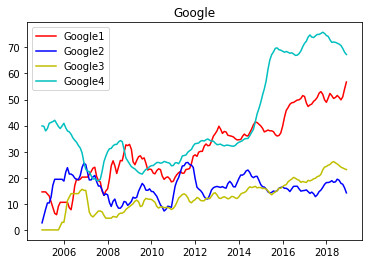

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gtsa['あんパン'][:168], linestyle='-', color='r', label='Google1')
ax.plot(gtsa['ジャムパン'][:168], linestyle='-', color='b', label='Google2')
ax.plot(gtsa['ぶどうパン'][:168], linestyle='-', color='y', label='Google3')
ax.plot(gtsa['メロンパン'][:168], linestyle='-', color='c', label='Google4')
ax.legend()
plt.title('Google')
plt.savefig("images/Google.png")

In [11]:
# Check correlation
gtsacor = gtsa
for i in range(0,len(gtsa.columns)):
  cor_temp = con['SCI'][132:300].corr(gtsa.iloc[:168,i])
  if cor_temp >= 0.85 or cor_temp <= -0.85:
    print("Correlation of level: {:.2f}".format(cor_temp))
  else:
    gtsacor = gtsacor.drop(columns=gtsa.columns[i])

Correlation of level: -0.85
Correlation of level: 0.87
Correlation of level: 0.86
Correlation of level: 0.85
Correlation of level: -0.86
Correlation of level: -0.86
Correlation of level: 0.86


In [12]:
gtsacor

,食料,きす,桃,タルタルソース,セメント,医薬品,幼稚園
date,,,,,,,
2005-01-01,50.958333,10.541667,25.041667,15.666667,67.958333,71.125000,43.958333
2005-02-01,50.166667,12.291667,24.625000,16.250000,69.208333,72.791667,43.750000
2005-03-01,50.166667,11.916667,24.208333,15.958333,69.666667,74.000000,43.833333
2005-04-01,50.375000,11.541667,24.166667,14.958333,69.750000,74.708333,44.458333
2005-05-01,51.791667,11.500000,24.208333,13.375000,70.833333,74.291667,45.000000
...,...,...,...,...,...,...,...
2021-07-01,37.833333,47.708333,74.541667,71.000000,47.541667,40.083333,72.750000
2021-08-01,38.666667,47.458333,75.250000,70.875000,47.750000,39.916667,72.375000
2021-09-01,39.333333,47.000000,75.708333,71.416667,48.041667,40.125000,72.083333


In [13]:
# MoM
gtmom = 100*gtsa.pct_change()
gtmom = gtmom.replace([np.inf, -np.inf], np.nan)
gtmom = gtmom[1:].dropna(how='any', axis=1)
gtmom.tail()

,食料,穀類,米,食パン,アップルパン,あんパン,ジャムパン,メロンパン,カレーパン,ピロシキ,揚げパン,野菜パン,うどん_x,そば_x,パスタ,スパゲッティ_x,中華麺,カップ麺,即席麺,ワンタン,シューマイ,ギョーザ,春巻,ビーフン,小麦粉,もち,パン粉,そば粉,米粉,白玉粉,ホットケーキ,お好み焼_x,魚介,まぐろ,あじ,いわし,かつお,かれい,さけ,さば,...,葬儀費用,七五三,医療保険料,がん保険,三大疾病保険,傷害保険,旅行保険,寄付金,共同募金,保育園_y,保育所_y,幼稚園,介護サービス,在宅サービス,ホームヘルプサービス,通所リハビリテーション,デイケア,通所サービス,デイサービス,施設サービス,介護老人福祉施設,介護老人保健施設,短期入所生活介護,短期入所療養介護,ショートステイ,郵便局,銀行,キャンセル料,こづかい,交際費,香典,見舞金,謝礼金,祝儀,結納金,共益費,町内費,消防費,労働組合費,留学
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-02-01,-1.553557e+00,4.716981e+01,-1.452599,1.149425,-3.877551e+01,0.000000e+00,1.000000e+02,-0.417973,5.172414,-6.506507,13.746631,-2.818182e+01,-0.631313,-2.270148e-01,0.233645,-2.190813,-2.948403,2.010050,40.983607,1.098901,-10.032895,1.485149e+00,11.531842,2.500000,-6.440678,2.086677e+00,3.636364,-11.196319,10.476190,2.895323,-0.606061,-4.838710,10.879630,0.972447,-2.683781e+00,4.628331,-1.812689,7.790368e+00,-3.100775,-0.458716,...,-2.577320,2.287582e+00,7.116105,1.367187,-3.333333e+01,-1.843658,-1.191363,2.521008,0.000000,-1.431981e+00,-2.762855,-0.473934,1.165803,-16.819572,0.000000,3.061224e+01,2.442002,2.455621e+01,5.274725,-0.368550,-7.965368,7.608696,1.021898e+01,0.000000e+00,-14.794521,0.994036,0.809935,2.097902,0.000000,1.423488,0.118483,2.892562,9.821429,3.497409,11.869031,-8.725762,1.363636e+01,0.000000e+00,48.000000,-0.350877
2005-03-01,-1.110223e-14,0.000000e+00,-1.008534,-6.818182,-1.110223e-14,2.220446e-14,4.538462e+01,-4.407135,7.923497,-14.453961,5.450237,-1.455696e+01,-1.270648,-5.688282e-01,0.466200,-0.650289,-5.189873,-2.463054,29.069767,7.971014,-4.021938,-1.219512e+00,-4.629630,0.750469,-2.898551,6.289308e-01,-7.017544,-18.480138,6.034483,-5.411255,-1.219512,-3.919492,16.075157,3.772071,-1.918465e+00,6.836461,-1.076923,3.942181e+00,2.000000,1.689708,...,-4.497354,1.597444e+00,-4.545455,1.926782,-5.000000e+01,-7.438017,-2.260739,2.459016,-5.397727,-2.421308e+00,0.710339,0.190476,-4.737516,-6.617647,-18.181818,4.440892e-14,-3.098927,1.971496e+01,2.505219,-5.055487,-6.020696,1.414141,-7.284768e+00,-1.110223e-14,13.826367,1.049869,0.482057,13.013699,0.000000,5.614035,2.248521,6.425703,8.943089,-0.125156,-6.219512,-10.015175,2.814750e+17,-2.220446e-14,32.432432,0.553320
2005-04-01,4.152824e-01,2.220446e-14,-0.626959,-3.658537,6.661338e-14,-5.428571e+00,3.121693e+01,2.414929,5.569620,-4.380476,-5.393258,2.888889e+01,-1.287001,1.144165e-01,-1.392111,2.036364,0.000000,-6.060606,-15.090090,17.785235,15.809524,-1.234568e+00,-7.766990,-3.165736,-1.865672,-4.440892e-14,-1.886792,-5.932203,1.626016,-9.839817,2.469136,1.433297,10.791367,2.165507,1.711491e+00,-0.125471,6.531882,3.666245e+00,4.705882,0.906344,...,-13.850416,1.257862e+00,-13.553114,9.829868,0.000000e+00,-4.383117,-3.084040,2.400000,-5.705706,-2.233251e+00,0.940439,1.425856,-3.897849,-0.393701,-22.222222,-2.220446e-14,-1.476015,-2.220446e-14,-0.203666,1.428571,-6.606607,-7.768924,-1.785714e+01,2.220446e-14,26.553672,0.129870,-0.319829,-6.666667,-13.333333,2.547065,0.694444,21.886792,0.000000,-0.501253,-4.291287,5.564924,1.000000e+02,2.220446e-14,0.000000,0.850425
2005-05-01,2.812242e+00,1.378205e+01,-2.208202,1.265823,-5.551115e-14,-5.740181e+00,-2.220446e-14,5.251876,0.479616,-2.879581,-18.289786,-4.440892e-14,-2.477184,-2.220446e-14,-0.235294,-1.568068,-1.068091,7.526882,-21.750663,6.267806,-9.210526,-1.750000e+00,-4.385965,2.500000,-3.041825,7.812500e-01,0.384615,-0.225225,-2.400000,-13.197970,3.012048,3.913043,2.110390,0.151400,2.220446e-14,-0.628141,12.554745,1.097561e+00,0.936330,-3.443114,...,-17.363344,-1.110223e-14,-12.288136,5.851979,5.000000e+01,1.612903,-1.511535,5.468750,1.592357,-4.440892e-14,-0.155280,1.218369,6.013986,-1.581028,0.000000,-2.220446e-14,0.249688,2.220446e-14,0.408163,5.889885,3.644159,-7.235421,-2.220446e-14,3.939394e+01,6.250000,0.259403,-0.267380,-14.285714,-7.287449,-0.647948,-1.379310,7.739938,0.000000,-0.251889,5.706522,15.335463,-2.220446e-14,-1.716102e+01,0.000000,-0.595238
2005-06-01,0.000000e+00,-3.661972e+00,-2.258

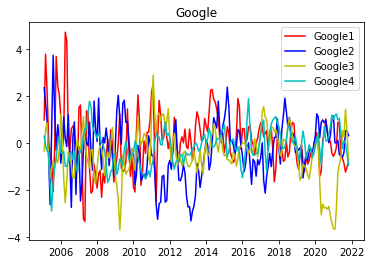

In [14]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gtmom.index, gtmom['まぐろ'][:], linestyle='-', color='r', label='Google1')
ax.plot(gtmom.index, gtmom['医薬品'][:], linestyle='-', color='b', label='Google2')
ax.plot(gtmom.index, gtmom['留学'][:], linestyle='-', color='y', label='Google3')
ax.plot(gtmom.index, gtmom['自動車'][:], linestyle='-', color='c', label='Google4')
ax.legend()
plt.title('Google')
plt.savefig("images/Google.png")

In [15]:
# Check correlation
gtmomcor = gtmom
for i in range(0,len(gtmom.columns)):
  cor_temp = con['mom'][133:300].corr(gtmom.iloc[:167,i])
  if cor_temp >= 0.2 or cor_temp <= -0.2:
    print("Correlation of mom: {:.2f}".format(cor_temp))
  else:
    gtmomcor = gtmomcor.drop(columns=gtmom.columns[i])


Correlation of mom: -0.25
Correlation of mom: -0.22
Correlation of mom: -0.22
Correlation of mom: -0.20


In [16]:
# YoY
a = 100*gt.pct_change(12)
b = a.replace([np.inf, -np.inf], np.nan)
gtyoy = b[12:].dropna(how='any', axis=1)
gtyoy.tail()

,食料,米,メロンパン,うどん_x,そば_x,パスタ,スパゲッティ_x,小麦粉,もち,ホットケーキ,まぐろ,あじ,いわし,かつお,さば,さんま,たい,ぶり,いか,たこ,えび,かに,たら,あゆ,はや,たらこ,白子,シーフード,あさり,しじみ,かき,青柳,あわび,いくら,塩辛,牛肉,豚肉,鶏肉,ラム,かも,...,ブレスレット,リボン,宝石,腕時計,懐中時計,ライター,パイプ,灰皿,フィルター_y,扇子,コンパクト,財布,サングラス,鎖,かつら_y,たばこ,教会,お札,お守り,墓地,線香,挙式,花嫁,傷害保険,旅行保険,寄付金,保育園_y,保育所_y,幼稚園,介護サービス,デイサービス,施設サービス,介護老人福祉施設,介護老人保健施設,郵便局,銀行,交際費,香典,祝儀,留学
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-51.000000,-14.545455,121.052632,0.000000,-2.631579,0.000000,-1.315789,-15.789474,17.241379,14.285714,-4.347826,-28.260870,-26.923077,-54.545455,-12.500000,-40.000000,-4.545455,-12.500000,61.764706,66.666667,-35.000000,18.750000,16.666667,0.000000,20.000000,35.000000,-55.102041,-82.758621,28.571429,-28.571429,172.413793,44.444444,-42.622951,-36.842105,-40.740741,-22.727273,-6.666667,-16.666667,-15.789474,30.000000,...,265.000000,-25.000000,-45.454545,67.857143,-56.976744,-29.473684,25.000000,-63.934426,2.777778,-25.000000,-16.981132,-6.250000,-14.814815,-23.529412,60.000000,-4.081633,1.612903,16.666667,100.000000,-38.000000,-83.333333,58.823529,-37.500000,27.272727,-16.363636,8.333333,-16.666667,-36.000000,2.702703,24.000000,53.846154,114.285714,-75.757576,337.500000,1.176471,10.810811,-28.947368,-5.000000,84.210526,-6.849315
2005-02-01,71.111111,-20.754717,-34.177215,-15.151515,-2.857143,5.882353,-50.847458,-66.666667,28.571429,-20.000000,26.415094,-34.482759,148.148148,0.000000,-3.448276,-31.250000,-7.692308,4.166667,50.000000,-36.923077,-6.250000,-15.151515,5.263158,-31.147541,-37.931034,333.333333,-17.460317,86.666667,-50.000000,-28.571429,-34.444444,-25.373134,-13.333333,42.857143,50.000000,-48.000000,22.222222,0.000000,3.636364,26.086957,...,23.809524,-26.666667,2.439024,15.789474,44.444444,10.937500,0.000000,193.750000,-4.255319,-25.000000,2.127660,22.222222,-15.384615,91.428571,500.000000,-15.555556,6.896552,-43.750000,-80.000000,-50.000000,-77.419355,-61.904762,-9.090909,-46.250000,-16.666667,50.000000,-14.285714,-12.328767,-13.953488,12.000000,89.473684,-62.790698,-25.373134,47.058824,26.923077,8.974359,88.461538,5.263158,42.307692,-2.352941
2005-03-01,-46.376812,-4.761905,-28.301887,-14.285714,-13.333333,5.882353,26.582278,266.666667,-16.000000,0.000000,157.142857,-13.953488,91.666667,-17.500000,54.545455,-8.695652,4.761905,21.739130,-12.765957,69.565217,-41.463415,14.814815,58.823529,2.631579,90.476190,44.444444,-52.000000,230.000000,7.142857,-10.000000,233.333333,-24.561404,-84.000000,25.000000,-40.000000,18.750000,-12.500000,128.571429,-29.230769,-17.142857,...,-12.121212,78.571429,-15.686275,-15.000000,183.333333,4.109589,61.290323,19.047619,2.127660,-52.380952,16.666667,140.000000,25.000000,13.207547,60.000000,-50.000000,-29.577465,-33.333333,-50.000000,-68.181818,-63.636364,11.904762,-70.833333,-68.131868,-52.272727,18.181818,-30.434783,45.000000,23.529412,-58.823529,-22.727273,-50.000000,-52.222222,-4.444444,3.076923,2.352941,147.058824,76.190476,-38.709677,19.117647
2005-04-01,115.625000,-10.909091,185.000000,-13.513514,17.241379,-26.923077,14.285714,-61.904762,25.000000,80.000000,-10.638298,62.500000,-38.709677,326.666667,-28.571429,-43.750000,21.052632,30.769231,103.125000,-46.341463,60.000000,4.545455,42.857143,-27.941176,40.000000,71.428571,-27.272727,-86.486486,-13.333333,-25.000000,-29.411765,-60.000000,-2.702703,33.333333,210.714286,7.142857,30.000000,50.000000,61.764706,-16.666667,...,94.117647,-27.272727,-24.390244,38.709677,-81.428571,1.234568,-22.000000,65.957447,12.195122,-80.645161,-3.333333,100.000000,-20.000000,80.000000,44.000000,-12.500000,47.058824,-25.000000,133.333333,-35.616438,-73.469388,-52.380952,-81.250000,14.035088,-27.868852,50.000000,-8.695652,-13.953488,17.073171,44.000000,21.052632,119.047619,-28.358209,-76.000000,0.000000,-9.411765,-5.128205,-28.571429,26.666667,4.166667
2005-05-01,-5.660377,-31.884058,29.268293,-32.558140,-13.513514,33.333333,-45.312500,100.000000,4.000000,14.285714,12.500000,-57.142857,21.212121,308.333333,-45.945946,41.666667,9.5

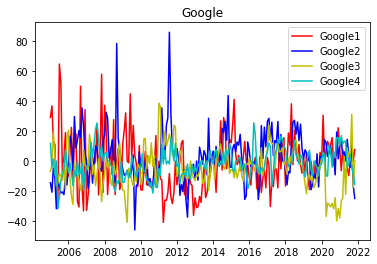

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gtyoy.index, gtyoy['医薬品'][:], linestyle='-', color='r', label='Google1')
ax.plot(gtyoy.index, gtyoy['米'][:], linestyle='-', color='b', label='Google2')
ax.plot(gtyoy.index, gtyoy['留学'][:], linestyle='-', color='y', label='Google3')
ax.plot(gtyoy.index, gtyoy['自動車'][:], linestyle='-', color='c', label='Google4')
ax.legend()
plt.title('Google')
plt.savefig("images/Google.png")

In [18]:
# Check correlation
gtyoycor = gtyoy
conyoy = 100*con.pct_change(12)['SCI'][132:300]
for i in range(0,len(gtyoy.columns)):
  cor_temp = conyoy.corr(gtyoy.iloc[:168,i])
  if cor_temp >= 0.3 or cor_temp <= -0.3:
    print("Correlation of yoy: {:.2f}".format(cor_temp))
  else:
    gtyoycor = gtyoycor.drop(columns=gtyoy.columns[i])


Correlation of yoy: -0.37
Correlation of yoy: 0.33
Correlation of yoy: -0.30
Correlation of yoy: -0.32
Correlation of yoy: -0.30
Correlation of yoy: -0.30
Correlation of yoy: -0.41


## Reduce dimensions by PCA

In [19]:
from sklearn.decomposition import PCA

# Define PCA function
def iterate_var(var_target):
    var_fig = 0.0
    cnt = 1
    while var_fig <= var_target:
        pca = PCA(n_components=cnt)
        dim = pca.fit_transform(gtsa)
        var_fig = sum(pca.explained_variance_ratio_) 
        cnt += 1
    return dim, pca

# Set explained variance
dim, pca = iterate_var(0.9)
gtpca = pd.DataFrame(dim, index=gtsa.index)
gtpca

,0,1,2,3
date,,,,
2005-01-01,-610.995877,179.086640,-154.495637,90.271775
2005-02-01,-610.961364,177.845287,-156.520856,93.194300
2005-03-01,-610.410060,178.546215,-157.794883,94.225939
2005-04-01,-607.921741,178.934385,-158.890954,93.996141
2005-05-01,-607.010174,177.588592,-158.042464,92.348468
...,...,...,...,...
2021-07-01,786.754889,274.055125,158.951871,139.889985
2021-08-01,784.476888,271.257529,158.039303,142.041818
2021-09-01,784.907857,271.063381,159.502212,145.768562


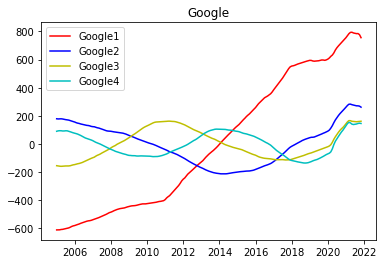

In [20]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(gtpca.index, gtpca[0][:], linestyle='-', color='r', label='Google1')
ax.plot(gtpca.index, gtpca[1][:], linestyle='-', color='b', label='Google2')
ax.plot(gtpca.index, gtpca[2][:], linestyle='-', color='y', label='Google3')
ax.plot(gtpca.index, gtpca[3][:], linestyle='-', color='c', label='Google4')
ax.legend()
plt.title('Google')
plt.savefig("images/Google.png")

In [21]:
# Aggregated PCA

import glob
files = glob.glob("./data/consumption_data/Aggregated/*")

from natsort import natsorted
file_sorted = natsorted(files)
file_sorted

['./data/consumption_data/Aggregated/100food.csv',
 './data/consumption_data/Aggregated/200jyutaku.csv',
 './data/consumption_data/Aggregated/300kounetsuhi.csv',
 './data/consumption_data/Aggregated/400kajikagu.csv',
 './data/consumption_data/Aggregated/500ifuku.csv',
 './data/consumption_data/Aggregated/600hokeniryo.csv',
 './data/consumption_data/Aggregated/700kotsu.csv',
 './data/consumption_data/Aggregated/740tuushin.csv',
 './data/consumption_data/Aggregated/800kyouiku.csv',
 './data/consumption_data/Aggregated/900goraku.csv',
 './data/consumption_data/Aggregated/940garakusa-bisu.csv',
 './data/consumption_data/Aggregated/991biyou.csv',
 './data/consumption_data/Aggregated/993minomawari.csv',
 './data/consumption_data/Aggregated/994syozappi.csv']

In [22]:
a = pd.read_csv(file_sorted[0], index_col=0, date_parser=dateparse, dtype='float')
data = a.iloc[:,0].drop(a.index[0:12])

for i in range(0,14):
  b = pd.read_csv(file_sorted[i], index_col=0, date_parser=dateparse, dtype='float')
  c = seasonal_decompose(b, two_sided=False, extrapolate_trend=0).trend
  d = c.drop(c.index[0:12])
  
  # Define PCA function
  def iterate_var(var_target):
     var_fig = 0.0
     cnt = 1
     while var_fig <= var_target:
        pca = PCA(n_components=cnt)
        dim = pca.fit_transform(d)
        var_fig = sum(pca.explained_variance_ratio_) 
        cnt += 1
     return dim, pca
  
  # Set explained variance
  dim, pca = iterate_var(0.9)
  e = pd.DataFrame(dim, index=data.index)
  data = pd.merge(data, e, on='date')

aggpca = data.drop(data.columns[0], axis=1)
aggpca

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry poi

,0_x,1_x,2_x,0_y,1_y,2_y,3_x,4_x,5,0_x,1_x,0_y,1_y,2_x,0_x,1_x,2_y,0_y,1_y,2_x,3_y,4_y,0_x,1_x,2_y,3_x,0_y,1_y,2_x,0_x,1_x,2_y,3_y,0_y,1_y,2_x,3_x,4_x,0_x,1_x,2_y,3_y,0_y,1_y,0_x,1_x,2_x,0_y,1_y,2_y,3,4_y
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01,-341.719637,77.702181,63.750711,-87.433924,-37.319733,-30.473040,-12.466472,-9.701497,18.560524,-48.312514,2.293748,-206.804348,-40.215940,65.498014,-214.828809,32.215403,-43.154540,131.713079,14.065775,42.246073,24.875809,-8.227844,121.613434,47.585239,-12.828329,-20.675041,-77.942246,67.689804,37.681150,71.489237,18.923371,17.843959,6.979214,234.769334,89.142002,-65.847364,48.806769,48.077106,117.749272,55.831737,-26.229552,35.680698,-166.944838,13.992264,-120.255547,26.242008,4.977784,-98.475954,25.332647,38.406524,13.117098,5.540215
2005-02-01,-342.494375,76.929160,67.044357,-87.279386,-40.163027,-31.212944,-11.972759,-9.596948,19.892018,-47.158001,2.937666,-207.011395,-42.694900,68.016938,-216.546059,31.772007,-44.256165,132.108945,15.796774,43.306325,26.998608,-6.448834,119.757355,46.394141,-11.699671,-19.912709,-77.610601,65.628189,35.809212,70.458058,17.525339,19.403230,7.669244,234.529571,85.506380,-67.288292,47.843725,47.738566,115.813074,55.875232,-24.429709,36.942846,-166.941817,15.653554,-118.705973,23.323033,6.681206,-97.686699,23.603282,37.147676,14.459114,3.847685
2005-03-01,-341.469216,78.025790,71.673518,-89.973107,-41.162813,-30.503442,-11.477561,-8.904943,23.092051,-46.636965,3.229889,-207.238746,-45.170193,70.243299,-218.924819,30.329868,-44.469257,133.650944,15.982871,44.640900,25.825543,-5.793756,118.032080,46.044203,-9.865129,-17.873186,-77.205848,63.949051,33.918965,70.739041,17.220618,20.117923,7.792973,233.177868,83.550797,-67.631046,45.713027,47.673909,114.697820,55.370250,-22.651757,36.632798,-165.608685,16.801248,-118.732450,22.436252,5.680356,-95.303621,24.706738,36.906727,14.400114,4.084133
2005-04-01,-339.332650,78.365749,75.521581,-91.108821,-41.999046,-29.756420,-11.890183,-8.188247,26.730981,-46.818952,3.445707,-206.949170,-47.203265,70.712950,-218.613850,28.861820,-44.287639,135.416037,15.171168,46.869790,28.092797,-3.885248,116.126689,44.496203,-9.790688,-15.475877,-76.939809,62.947664,31.848385,70.187389,15.668592,21.834782,7.381822,232.114443,83.479445,-67.080074,45.017019,47.815775,113.057904,54.773065,-21.657662,33.685621,-165.325894,17.552655,-117.692482,23.257014,5.103432,-92.835138,25.656814,37.909205,13.604384,8.410417
2005-05-01,-339.177424,78.537874,76.934927,-91.883563,-42.099962,-29.497358,-9.349311,-7.196283,27.801912,-45.587706,5.326305,-206.892688,-47.320306,70.071746,-217.681120,29.352827,-43.668035,136.735552,16.250689,48.511575,32.476006,-1.026561,113.610657,41.402224,-12.016289,-14.339388,-76.115101,61.275722,30.673801,69.366036,13.557110,24.340901,5.329139,231.721215,83.582794,-66.117440,45.156709,44.173737,110.528990,53.637729,-20.939974,31.823445,-166.745506,16.387543,-117.242792,23.722565,5.580859,-92.403413,25.591765,36.796060,14.407179,10.671724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,550.250631,133.399190,-65.902932,108.427942,-40.250640,20.403903,-17.753996,23.208996,17.088679,58.174557,15.532245,332.727032,-80.016825,-29.198060,208.312093,83.403232,46.732407,-120.006544,55.489206,-12.439332,9.034009,-21.135924,-97.696654,46.242790,7.847345,38.995781,72.370315,26.075003,6.015092,-56.808222,33.419601,-2.633554,18.284545,-220.194800,110.208633,54.717862,37.024865,-29.701812,-83.128136,36.554029,86.024409,21.701034,217.759464,82.918578,128.149250,45.676410,51.832542,108.627325,53.248994,-11.390012,22.498279,2.564405
2021-08-01,550.754623,134.176175,-66.976226,106.076000,-39.518757,19.698339,-17.490718,23.123547,15.950085,58.733778,14.632697,328.598676,-78.205130,-28.432814,206.833149,81.789304,47.587332,-121.214444,55.

## Time Series Analysis

In [23]:
# Set time series dataset
X = gtsacor[:168]
y = con['3ma'][132:300]
ts = pd.concat([y, X], axis=1)
ts

,3ma,食料,きす,桃,タルタルソース,セメント,医薬品,幼稚園
date,,,,,,,,
2005-01-01,94.300000,50.958333,10.541667,25.041667,15.666667,67.958333,71.125000,43.958333
2005-02-01,94.366667,50.166667,12.291667,24.625000,16.250000,69.208333,72.791667,43.750000
2005-03-01,94.666667,50.166667,11.916667,24.208333,15.958333,69.666667,74.000000,43.833333
2005-04-01,94.866667,50.375000,11.541667,24.166667,14.958333,69.750000,74.708333,44.458333
2005-05-01,95.000000,51.791667,11.500000,24.208333,13.375000,70.833333,74.291667,45.000000
...,...,...,...,...,...,...,...,...
2018-08-01,100.866667,27.708333,58.916667,49.083333,42.375000,45.291667,39.125000,76.625000
2018-09-01,100.800000,27.791667,59.958333,48.666667,43.083333,45.208333,39.250000,76.625000
2018-10-01,100.833333,27.750000,61.125000,48.750000,43.583333,45.125000,39.416667,76.833333


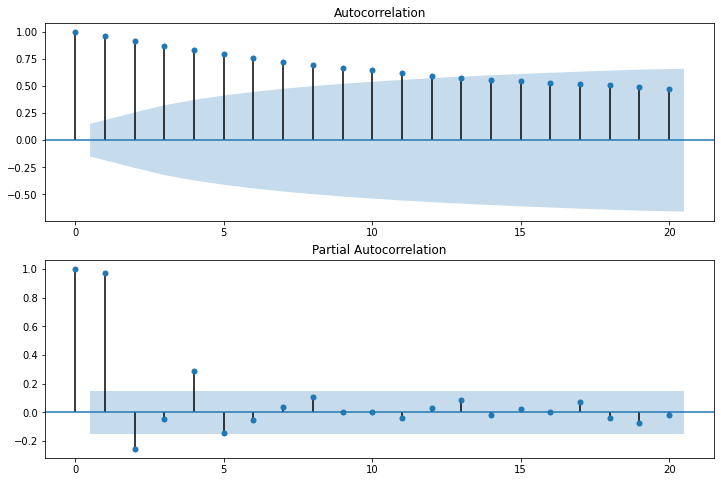

In [24]:
# Check Autocorrelation of y
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts['3ma'], lags=20, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts['3ma'], lags=20, ax=ax2)
plt.savefig("images/autocorrelation.png")

In [25]:
# Unit root test of y (H0: non-stationary)
adf_result = sm.tsa.stattools.adfuller(ts['3ma'])
print("Unit root test (y): {:.2f}".format(adf_result[1])) # p-value

# Take difference of y
diff = ts['3ma'].diff()
diff = diff.dropna()
adf_result = sm.tsa.stattools.adfuller(diff)
print("Unit root test (diff_y): {:.2f}".format(adf_result[1])) # p-value

# Unit root test of X (H0: non-stationary)
adf_result = sm.tsa.stattools.adfuller(ts.iloc[:,1])
print("Unit root test (X): {:.2f}".format(adf_result[1])) # p-value

# Take difference of X
diff = ts.iloc[:,1].diff()
diff = diff.dropna()
adf_result = sm.tsa.stattools.adfuller(diff)
print("Unit root test (diff_X): {:.2f}".format(adf_result[1])) # p-value

# Cointegration test (H0: non-cointegration)
coint_result = sm.tsa.stattools.coint(ts['3ma'], ts.iloc[:,1])
print("Cointegration test: {:.2f}".format(coint_result[1])) # p-value

Unit root test (y): 0.55
Unit root test (diff_y): 0.00
Unit root test (X): 0.60
Unit root test (diff_X): 0.00
Cointegration test: 0.03


### ARIMA Prediction

In [26]:
# Split data into training and test set 
sp = round(0.8*len(ts))
train = ts[0:sp]
test = ts[sp:]

In [27]:
# Fit the model
SARIMAX = sm.tsa.SARIMAX(train['3ma'], train.iloc[:,1:], order=(1,0,0), freq='MS').fit()
print(SARIMAX.summary())

                           Statespace Model Results                           
Dep. Variable:                    3ma   No. Observations:                  134
Model:               SARIMAX(1, 0, 0)   Log Likelihood                 -87.470
Date:                Mon, 17 Jan 2022   AIC                            192.940
Time:                        06:00:30   BIC                            219.020
Sample:                    01-01-2005   HQIC                           203.538
                         - 02-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
食料            -0.1103      0.048     -2.275      0.023      -0.205      -0.015
きす             0.0553      0.043      1.282      0.200      -0.029       0.140
桃              0.0520      0.145      0.359      0.7

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Test set score: 0.17


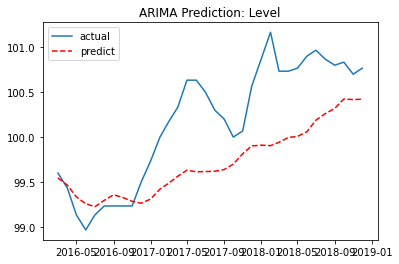

In [28]:
pred = SARIMAX.predict('2016-03-01', '2018-12-01', exog=test.iloc[:,1:])
plt.plot(test['3ma'], label="actual")
plt.plot(pred, "r", linestyle='--', label="predict")
plt.legend(loc='best')
plt.title('ARIMA Prediction: Level')
plt.savefig("images/level_arima.png")
from sklearn.metrics import r2_score
print("Test set score: {:.2f}".format(r2_score(test['3ma'], pred)))

## Random Forest Model

DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=168, freq=None)
DatetimeIndex(['2005-01-01', '2005-02-01', '2005-03-01', '2005-04-01',
               '2005-05-01', '2005-06-01', '2005-07-01', '2005-08-01',
               '2005-09-01', '2005-10-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', name='date', length=168, freq=None)
Training set score: 0.99
Cross-Validation score: 0.47


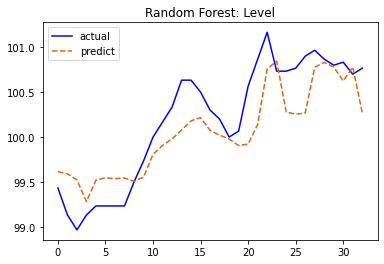

In [29]:
# Set X and y variables (2005-2018)
X = gtsacor[:168]
y = con['3ma'][132:300]
print(X.index)
print(y.index)

# Preprocess for adding AR
X_l = X.drop(X.index[0])
X_l.reset_index(inplace=True, drop=True)

# Generate AR variable
y_l = y.drop(y.index[-1])
y_l.reset_index(inplace=True, drop=True)

# Add AR into X
X_t = pd.concat([y_l, X_l], axis=1)
y_t = y.drop(y.index[0])
X_t.index = y_t.index

# Split data into training and test set 
sp = round(0.8*len(X_t))
X_train = X_t[0:sp]
X_test = X_t[sp:]
y_train = y_t[0:sp]
y_test = y_t[sp:]

# Fit the model
from sklearn.ensemble import RandomForestRegressor
tm = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
#print(tm.feature_importances_)

# Goodness of Fit
from sklearn.model_selection import cross_val_score
print("Training set score: {:.2f}".format(tm.score(X_train, y_train)))
print("Cross-Validation score: {:.2f}".format(np.mean(cross_val_score(tm, X_train, y_train, cv=5))))
#print("Test set score: {:.2f}".format(tm.score(X_test, y_test)))

# Calculate the prediction
prediction = pd.DataFrame(tm.predict(X_test))
pre = prediction.values.tolist()
act = y_test.values.tolist()
predict = pd.DataFrame(pre, columns=['predict'])
actual = pd.DataFrame(act, columns=['actual'])
com = pd.concat([predict, actual], axis=1)

# Plot the prediction
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(com.index, com.actual, linestyle='-', color='b', label='actual')
ax.plot(com.index, com.predict, linestyle='--', color='#e46409', label='predict')
ax.legend(loc='best')
ax.set_title('Random Forest: Level')
plt.savefig("images/rf_level.png")

## RNN-LSTM

In [30]:
# set features
X = gtsacor[:168]
y = con['3ma'][132:300]
features = pd.concat([y, X], axis=1)
features

,3ma,食料,きす,桃,タルタルソース,セメント,医薬品,幼稚園
date,,,,,,,,
2005-01-01,94.300000,50.958333,10.541667,25.041667,15.666667,67.958333,71.125000,43.958333
2005-02-01,94.366667,50.166667,12.291667,24.625000,16.250000,69.208333,72.791667,43.750000
2005-03-01,94.666667,50.166667,11.916667,24.208333,15.958333,69.666667,74.000000,43.833333
2005-04-01,94.866667,50.375000,11.541667,24.166667,14.958333,69.750000,74.708333,44.458333
2005-05-01,95.000000,51.791667,11.500000,24.208333,13.375000,70.833333,74.291667,45.000000
...,...,...,...,...,...,...,...,...
2018-08-01,100.866667,27.708333,58.916667,49.083333,42.375000,45.291667,39.125000,76.625000
2018-09-01,100.800000,27.791667,59.958333,48.666667,43.083333,45.208333,39.250000,76.625000
2018-10-01,100.833333,27.750000,61.125000,48.750000,43.583333,45.125000,39.416667,76.833333


In [31]:
# set training percentage
TRAIN_SPLIT = round(0.8*len(features))
print(TRAIN_SPLIT)

# feature scaling
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

134


In [32]:
# create training and test data
past_history = 3
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:,0], 0, TRAIN_SPLIT, past_history, future_target, STEP, single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:,0], TRAIN_SPLIT, None, past_history, future_target, STEP, single_step=True)

In [33]:
# dataset
pd.DataFrame(dataset).head(5)

,0,1,2,3,4,5,6,7
0,-1.594496,1.642061,-1.150362,-0.782132,-0.810322,0.919681,0.640131,-1.066980
1,-1.562898,1.558525,-1.069357,-0.824734,-0.745755,1.051934,0.758363,-1.085598
2,-1.420709,1.558525,-1.086716,-0.867336,-0.778039,1.100426,0.844082,-1.078151
3,-1.325917,1.580508,-1.104074,-0.871596,-0.888725,1.109243,0.894330,-1.022295
4,-1.262722,1.729992,-1.106003,-0.867336,-1.063978,1.223862,0.864772,-0.973887


In [34]:
# X variables
pd.DataFrame(x_train_single[0])

,0,1,2,3,4,5,6,7
0,-1.594496,1.642061,-1.150362,-0.782132,-0.810322,0.919681,0.640131,-1.066980
1,-1.562898,1.558525,-1.069357,-0.824734,-0.745755,1.051934,0.758363,-1.085598
2,-1.420709,1.558525,-1.086716,-0.867336,-0.778039,1.100426,0.844082,-1.078151
3,-1.420709,1.580508,-1.104074,-0.871596,-0.888725,1.109243,0.894330,-1.022295


In [35]:
# y variable
y_train_single[0]

-1.325916781393684

In [36]:
import tensorflow as tf

BATCH_SIZE = 32
BUFFER_SIZE = 100

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [37]:
# construct the model

single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(8, input_shape=x_train_single.shape[-2:]))
#single_step_model.add(tf.keras.layers.LSTM(8, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
#single_step_model.add(tf.keras.layers.LSTM(8, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
#single_step_model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(4)))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001), loss='mae')

In [48]:
# train the model
single_step_history = single_step_model.fit(train_data_single, epochs=10, steps_per_epoch=200, validation_data=val_data_single, validation_steps=50)

# evaluate the model
print(model_eval_metrics(y_val_single, single_step_model.predict(x_val_single), classification="FALSE"))

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0713 - val_loss: 0.0778
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0711 - val_loss: 0.0779
Epoch 3/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0709 - val_loss: 0.0781
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0707 - val_loss: 0.0772
Epoch 5/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0705 - val_loss: 0.0759
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0703 - val_loss: 0.0745
Epoch 7/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0702 - val_loss: 0.0771
Epoch 8/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0700 - val_loss: 0.0769
Epoch 9/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0697 - val_loss: 0.0766
Epoch 10/10
200/200 [==============================] - 1s 3ms/step - loss: 0.0696 - val_loss: 0.0759

Test set score: 0.90


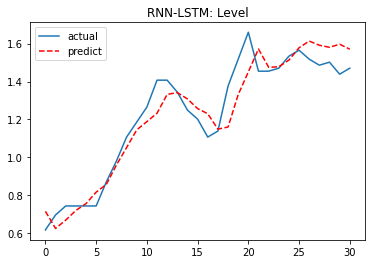

In [47]:
print("Test set score: {:.2f}".format(r2_score(y_val_single, single_step_model.predict(x_val_single))))

# visualize the result
plt.plot(y_val_single, label="actual")
plt.plot(single_step_model.predict(x_val_single), "r", linestyle='--', label="predict")
plt.legend(loc='best')
plt.title('RNN-LSTM: Level')
plt.savefig("images/lstm.png")